<a href="https://colab.research.google.com/github/rocioromera911/Portafolio_RR/blob/main/01_FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación de Imágenes con Keras DNN- Fashion MNIST

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras  #importamos la versión de Keras que viene con tf
from sklearn.utils import shuffle

Por las dudas revisemos las versiones:

In [ ]:
tf.__version__

'2.5.0'

In [ ]:
keras.__version__

'2.5.0'

## Los Datos

Fashion MNIST está formado por 70 mil imágenes de artículos de vestir categorizados como zapatos, remeras, pantalones etc. 60 mil están en el Train Set y 10 mil en el Test Set.   

Cada imagen tiene una resolución de 28x28 pixels en escala de grises (8 bits) y  está guardada como un array de numpy de 28 x 28. Cada elemento del array (matriz en este caso) almacena al valor de gris que le corresponde en la imagen (de 0 a 255 ya que es escala de grises de 8 bits, $2⁸ = 256$).


Este dataset puede obtenerse desde el mismo sitio de TensorFlow / Keras ya que es muy utilizado para comparar algoritmos y efectuar pruebas.  

El objetivo es clasificar correctamente nuevas imágenes en alguna de estas categorías
Es algo más difícil que el original dataset de MNIST que contiene imágenes de números.  

Las descripción del DataSet Fashion MNIST es la siguiente:

Loads the Fashion-MNIST dataset.  
This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST. The class labels are:  

| Label | Description |
|:-----:|-------------|
|   0   | T-shirt/top |
|   1   | Trouser     |
|   2   | Pullover    |
|   3   | Dress       |
|   4   | Coat        |
|   5   | Sandal      |
|   6   | Shirt       |
|   7   | Sneaker     |
|   8   | Bag         |
|   9   | Ankle boot  |


Returns:
Tuple of Numpy arrays:  
(x_train, y_train), (x_test, y_test).  

**x_train, x_test**: uint8 arrays of grayscale image data with shape (num_samples, 28, 28).  

**y_train, y_test**: uint8 arrays of labels (integers in range 0-9) with shape (num_samples,).


License:
The copyright for Fashion-MNIST is held by Zalando SE.
Fashion-MNIST is licensed under the [MIT license](
https://github.com/zalandoresearch/fashion-mnist/blob/master/LICENSE).


Como en el Dataset las clases aparecen con el número (label) que las identifica, vamos a guardar las denominaciones de las mismas porque pueden ser de utilidad más adelante.

In [ ]:
y_clases=['T-shirt/top','Trouser', 'Pullover', 'Dress','Coat', 'Sandal',  'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
# La primera vez, descomentar el siguiente código que bajará los datos desde el sitio de Google
# Más adelante lo guardaremos en nuestra máquina local, así que ya no será necesario correrlo nuevamente

#fashion_mnist = keras.datasets.fashion_mnist
#(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

### Guardamos los datos originales para uso posterior:  

Los datasets que hemos obtenido son arrays de numpy.
Como nuestras conexiones suelen ser más lentas que las del resto del mundo ... vamos a guardar estos datos en nuestra máquina local para usarlos posteriormente

In [ ]:
# La primera vez descomentar este código que es para guardar los datos de Fashion MNIST en nuestra máquina local
# debe tener creada una carpeta data/ en el directorio de este archivo.
# No olvide que por defecto numpy agregará la extensión .npy a a cada uno de estos archivos

#np.save('data/X_train', X_train)
#np.save('data/y_train', y_train)
#np.save('data/X_test', X_test)
#np.save('data/y_test', y_test)

### Cargamos los datos desde nuestra máquina

In [ ]:
X_train=np.load('data/X_train.npy')
y_train=np.load('data/y_train.npy')
X_test=np.load('data/X_test.npy')
y_test=np.load('data/y_test.npy')


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

### Distribucióń de las clases de y

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_test.shape

(10000,)

Los valores de y son los siguientes: (acá es donde extraño a Pandas ...)

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

y las cantidades de cada uno de ellos, es decir sus frecuencias:

In [ ]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

Como podemos ver hay un equilibrio en las cantidades de casos para cada clase.

### Visualización de los datos

Cuando trabajamos con imágenes es irresistible la tentación de visualizarlas. En este sentido matplotib es una herramienta muy útil ya que nos permite graficar imágenes a partir de sus valores ubicados como array de numpy, una opción muy poderosa!.   

Documentación:  https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.imshow.html

Veamos la primera de las imágenes:

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
import matplotlib.pyplot as plt

# info sobre los mapas de color cmap: https://matplotlib.org/3.3.3/tutorials/colors/colormaps.html

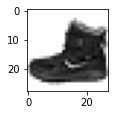

'Ankle boot'

In [ ]:
imagen=0   # puede cambiar el número

plt.figure(figsize = (1.5,1.5))
plt.imshow(X_train[imagen], cmap='binary', vmin=0, vmax=255)
plt.show()

# Para obtener el nombre de la clase:
y_clases[y_train[imagen]]

También podemos hacer algo un poco más elegante usando matplotlib, cuestión de investigarlo un poco ...

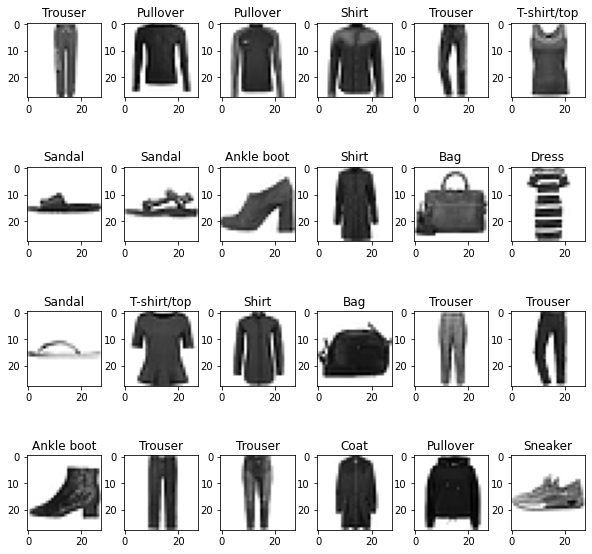

In [ ]:
pos_inicial=1000             # Seleccionar a partir de qué imagen queremos ver ésa y las  23 imágenes siguientes

plt.figure(figsize = (10,10))               # tamaño de todo el plot
plt.subplots_adjust(wspace=0.3, hspace=0.3) # para ajustar los espaciados entre cada subplot, como % del total

for i in range(0,24):
    # cargamos la imagen en cada subplot con imshow()
    plt.subplot(4,6,i+1)
    plt.imshow(X_train[pos_inicial+i], cmap='binary', vmin=0, vmax=255)
    plt.title(y_clases[y_train[pos_inicial+i]])         # obtenemos la clase desde y_clases y la ponemos como título

plt.show()


### Validation Train y Validation Test

Como no nos proveen del conjunto de validación los crearemos nosotros. Como sabemos que los datos están desordenados no los mezclaremos, sino sería conveniente hacer un shuffle.

Tomaremos unas 5 mil imágenes para crear el validation set.

In [ ]:
#Si se hace una mezcla del dataset del train
X_train, y_train = shuffle(X_train, y_train, random_state= 123)

In [ ]:
X_val_test=X_train[:5000]
X_val_train=X_train[5000:]

y_val_test=y_train[:5000]
y_val_train=y_train[5000:]


## Modelo

### Arquitectura de la DNN

- Función de **Activación de las hidden layers**: vamos con **ReLu** que es la "estrella" en la actualidad.

- Función de **Activación de la capa de salida**: en nuestro caso tenemos una única variable de salida, pero que puede tomar más de 2 valores, de hecho 10 valores, necesitaremos 10 neuronas en la capa de salida y una sugerencia es utilizar **softmax**, que nos dará la probabilidad de que sea cada una de las clases, y si sumáramos todas las probabilidades obtenidas para una observación, el resultado sería 1.

In [ ]:
model = keras.models.Sequential([keras.layers.Flatten(input_shape=[28, 28]),
                                keras.layers.Dense(300, activation="relu"),
                                keras.layers.Dense(100, activation="relu"),
                                keras.layers.Dense(10, activation="softmax")
                                ])

Qué es __keras.layers.Flatten__?

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


### Compilación del modelo

- **Loss Function J**: En nuestro caso tenemos una única variable de salida, pero que puede tomar más de 2 valores (en este caso cada uno de los 10 tipos de imagen), entonces una sugerencia es utilizar para loss la opción **"sparse_categorical_crossentropy"**

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
                optimizer="sgd",
                metrics=["accuracy"])

### Entrenamiento del modelo

In [ ]:
history = model.fit(X_val_train, y_val_train, epochs=10,
                    validation_data=(X_val_test, y_val_test))

Epoch 1/10
1719/1719 [==============================] - 3s 2ms/step - loss: 31460.6074 - accuracy: 0.0986 - val_loss: 2.3194 - val_accuracy: 0.1024
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 2.3027 - accuracy: 0.0994 - val_loss: 2.3194 - val_accuracy: 0.0976
Epoch 3/10
1719/1719 [==============================] - 3s 1ms/step - loss: 2.3027 - accuracy: 0.0975 - val_loss: 2.3195 - val_accuracy: 0.0986
Epoch 4/10
1719/1719 [==============================] - 3s 1ms/step - loss: 2.3027 - accuracy: 0.0972 - val_loss: 2.3194 - val_accuracy: 0.0980
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3194 - val_accuracy: 0.0976
Epoch 6/10
1719/1719 [==============================] - 2s 1ms/step - loss: 2.3027 - accuracy: 0.0975 - val_loss: 2.3193 - val_accuracy: 0.0914
Epoch 7/10
1719/1719 [==============================] - 3s 1ms/step - loss: 2.3027 - accuracy: 0.0974 - val_loss: 2.3195 - val_accur

Qué resultados tan decepcionantes!!! De seguro con cualquier otro algoritmo de Machine Learning *Clásico* hubieramos podido obtener una mejor Accuracy!

Veamos las learning curves:

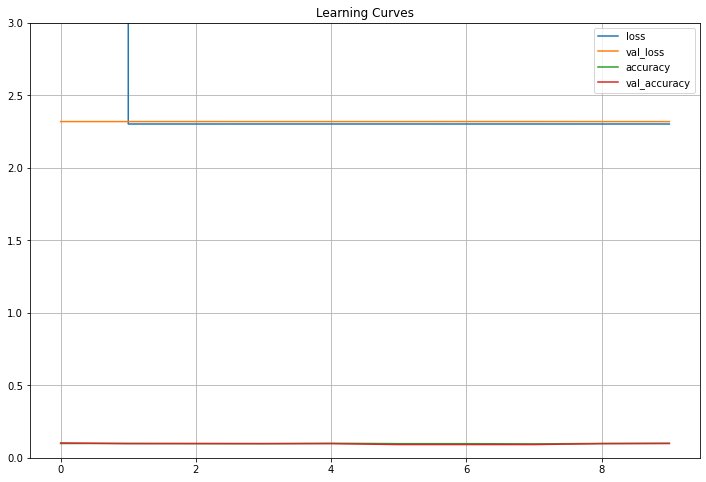

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_historial=pd.DataFrame(model.history.history)
df_historial[['loss','val_loss','accuracy', 'val_accuracy']].plot(figsize=(12, 8),
                                                                  grid=True,
                                                                  title="Learning Curves",
                                                                  ylim=(0,3));


Dónde está el problema?   

- underfitting? Parecería que sí.

Pero antes:

En nuestro caso hemos usado SGD (Stochastic Gradient Descent) como método de optimización, es posible que el pobre haya quedado atrapado en algún mínimo local que no es el menor valor posible, también es posible que la elección al azar de los valores para los parámetros $w_i$ no haya sido muy afortunada, también es posible que SGD esté funcionando mal porque no hemos estandarizado los valores de entrada ... recordemos que la escala de grises está codificada como un valor entre 0 y 255 ... **generalmente los algoritmos están diseñados para funcionar con datos estandarizados, por ejemplo entre 0 y 1 o entre -1 y 1**.  

Trabajar con imágenes a veces facilita las cosas, podemos hacer una estandarización entre 0 y 1 simplemente dividiendido en 255 los valores de X!  



Probemos:  


In [ ]:
X_val_train1=X_val_train/255
X_val_test1=X_val_test/255

X_test1=X_test/255

In [ ]:
np.max(X_val_train1)

1.0

Ahora probemos de nuevo:

In [ ]:
model1 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model1.compile(loss="sparse_categorical_crossentropy",
                optimizer="sgd",
                metrics=["accuracy"])

In [ ]:
model1.fit(X_val_train1, y_val_train, epochs=30,
                    validation_data=(X_val_test1, y_val_test))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 2.3127 - accuracy: 0.1008 - val_loss: 2.3065 - val_accuracy: 0.1024
Epoch 2/30
1719/1719 [==============================] - 3s 1ms/step - loss: 2.3034 - accuracy: 0.1048 - val_loss: 2.3052 - val_accuracy: 0.0972
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 2.3010 - accuracy: 0.1107 - val_loss: 2.3048 - val_accuracy: 0.1008
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 2.2993 - accuracy: 0.1138 - val_loss: 2.3068 - val_accuracy: 0.1018
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 2.2978 - accuracy: 0.1157 - val_loss: 2.3068 - val_accuracy: 0.0996
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 2.2965 - accuracy: 0.1173 - val_loss: 2.3076 - val_accuracy: 0.1032
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 2.2949 - accuracy: 0.1213 - val_loss: 2.3086 - val_accuracy:

Ahora sí hemos obtenido resultados muy buenos, considerando que en las competencias con Fashion MNIST suelen andar por valores cercanos a una accuracy de alrededor de 0.93.

Cuánto podríamos esperar obtener en el test Set?

### Learning Curves:

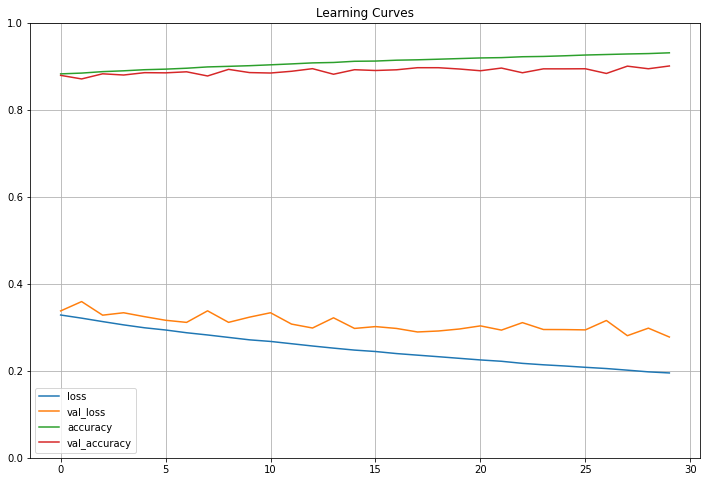

In [ ]:

df_history=pd.DataFrame(model1.history.history)
df_history[['loss','val_loss','accuracy', 'val_accuracy']].plot(figsize=(12, 8),grid=True, title="Learning Curves",ylim=(0,1));


### Capa de Salida con Softmax:

**softmax** nos brinda por resultado 10 probabilidades, una por cada clase,  y por lo tanto elige la mayor como pronóstico para cada observación.  

Voy a tomar la primer observación del X_val_train1 y ver qué pronosticó:

In [ ]:
model1.predict(X_val_train1[0:1])

# nota si uso X_val_train1[0] me da error porque como es un solo resultado, numpy siempre los lleva a la
# menor dimensión posible y falla en la capa flatten. Por eso le puse desde 0 a 1 y mantiene la misma estructura
# completa con la que fue entrenado.

array([[5.0451148e-05, 4.4637684e-07, 4.2772201e-01, 9.0362792e-06,
        4.4090435e-01, 8.1497395e-09, 1.3118540e-01, 5.0597282e-09,
        1.2830197e-04, 1.1693143e-09]], dtype=float32)

Como podemos ver, tenemos 10 valores, la salida de softmax nos está dando la probabilidad de que pertenezca a cada una de las clases.  

Si las sumamos, debería dar 1:

In [ ]:
np.sum(model1.predict(X_val_train1)[0])

1.0

Podemos ver que el la mayor probabilidad corresponde a la clase que está en el 5to lugar (0.673) es decir la clase 4 porque su numeración comienza en 0.   

Veamos si acertó:

In [ ]:
y_val_train[0]

4